In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

1. Colisiones

In [ ]:
def vfv(m1,m2,v,u):

  v1 = ((2*m2*u)+(m1-m2)*v)/(m1+m2)
  return v1

def vfu(m1,m2,v,u):

  u1 = ((2*m1*v)+(m2-m1)*u)/(m1+m2)
  return u1

In [ ]:
def colisiones(m1,m2,v,u):

  v_1 = v
  u_1 = u
  c = 0

  while not (np.abs(u_1 - v_1) > 0 and u_1 < 0 and v_1 < 0):
      v_2 = vfv(m1, m2, v_1, u_1)
      u_2 = vfu(m1, m2, v_1, u_1)
      c += 1  # Cuenta el choque entre las masas
      v_1 = -v_2  # Invierte la dirección después de la colisión
      u_1 = u_2  # Velocidad de la segunda masa después de la colisión

  return c, v_1, u_1

In [ ]:
colisiones(1,100,0,-10)

(24, -99.74302018585259, -0.7164490505583093)

2. Tiro parabólico

In [ ]:
def movi_x(v0,b,theta,t_est,g = 9.8):
  rad = (theta * np.pi) / 180
  vo_x = v0 * np.cos(rad)
  return (vo_x / b) * (1 - np.exp(-b * t_est))

In [ ]:
def movi_y(v0,b,theta,t_est,g = 9.8):
  rad = (theta * np.pi) / 180
  vo_y = v0 * np.sin(rad)
  g = 9.8
  return (1 / b) * ((g / b) + vo_y) * (1 - np.exp(-b * t_est)) - ((g / b) * t_est)

In [ ]:
t = np.linspace(0,8,100)
mov_x = np.zeros(len(t))
mov_y = np.zeros(len(t))

for i in range(len(t)):
  mov_x[i] = movi_x(55,0.005,45,t[i])
  mov_y[i] = movi_y(55,0.005,45,t[i])

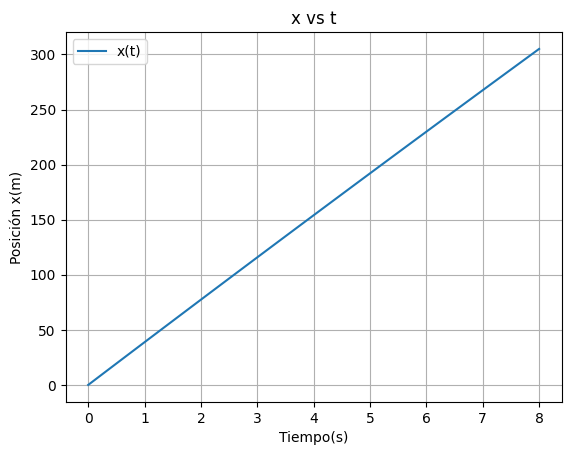

In [ ]:
#Grafica x
plt.plot(t,mov_x,label='x(t)')
plt.xlabel('Tiempo(s)')
plt.ylabel('Posición x(m)')
plt.title('x vs t')
plt.legend()
plt.grid()

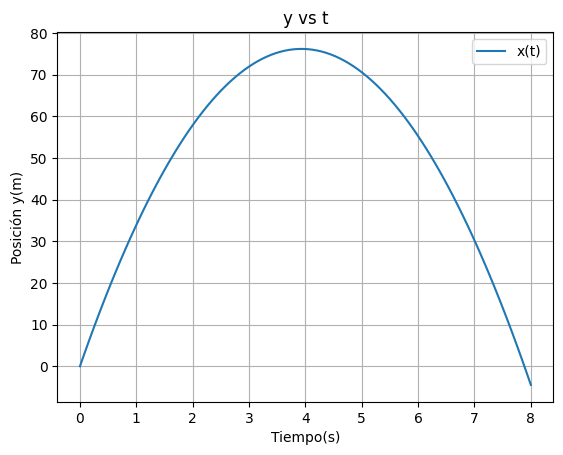

In [ ]:
#Grafica y
plt.plot(t,mov_y,label='x(t)')
plt.xlabel('Tiempo(s)')
plt.ylabel('Posición y(m)')
plt.title('y vs t')
plt.legend()
plt.grid()

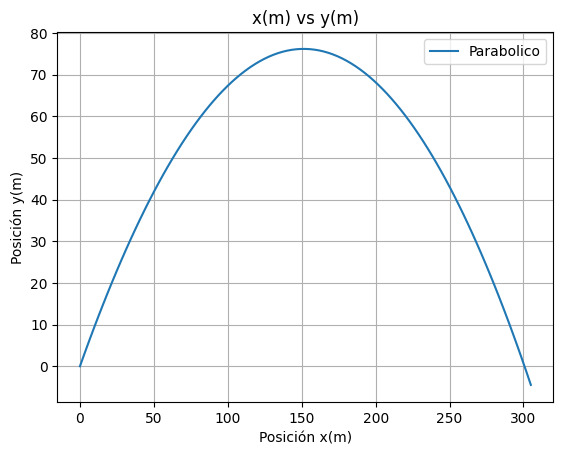

In [ ]:
#Grafica x vs y
plt.plot(mov_x,mov_y,label='Parabolico')
plt.xlabel('Posición x(m)')
plt.ylabel('Posición y(m)')
plt.title('x(m) vs y(m)')
plt.legend()
plt.grid()

3. Planetario Medellin

In [ ]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
x_ = np.array([332,335,340,348,357,369,386,409,433,456,486,514,538,569,595,622,666,689,710,725,737,744,745])
y_ = np.array([233,212,192,170,149,128,107,88,71,58,48,42,41,43,49,58,86,106,133,162,191,221,250])

In [ ]:
#Segun las pruebas que he hecho, 6 son la cantidad máxima de datos para tener una buena aproximación y evitar el fenómeno de Runge
polinomio_1 = lagrange(x_[0:6],y_[0:6])
polinomio_1

poly1d([-1.26421165e-05,  2.22101569e-02, -1.56042367e+01,  5.48031649e+03,
       -9.62155268e+05,  6.75549846e+07])

Text(0, 0.5, 'Posición en y(pixels)')

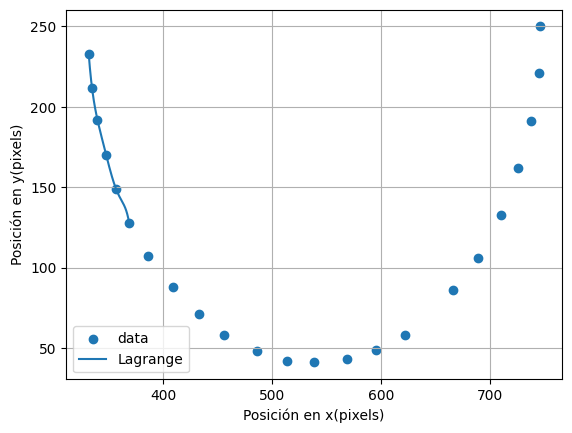

In [ ]:
#generar los puntos a graficar
x_new = np.linspace(min(x_[0:6]),max(x_[0:6]),200)
y_new = polinomio_1(x_new)
#grafica
plt.scatter(x_, y_, label='data')
plt.plot(x_new,y_new,label='Lagrange')
plt.legend()
plt.grid()
plt.xlabel('Posición en x(pixels)')
plt.ylabel('Posición en y(pixels)')

Text(0.5, 1.0, 'Aproximación a la cúpula del planetario')

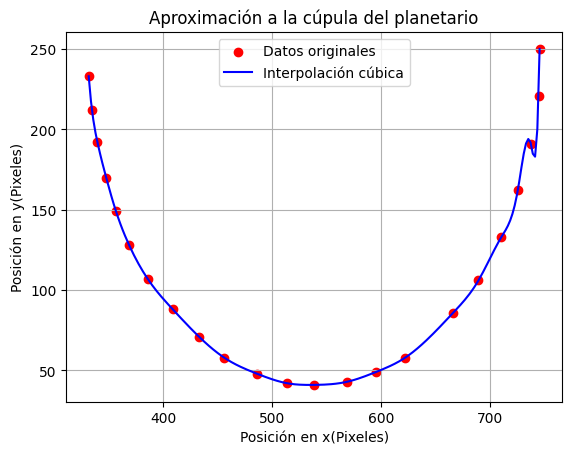

In [ ]:
#grafica con splines
# Crear la función spline
from scipy.interpolate import CubicSpline
polinomio_spline = CubicSpline(x_, y_)

# Generar valores interpolados
x_new = np.linspace(min(x_), max(x_), 200)
y_new = polinomio_spline(x_new)

# Graficar
plt.scatter(x_, y_, color='red', label='Datos originales')
plt.plot(x_new, y_new, label='Interpolación cúbica', color='blue')

plt.xlabel('Posición en x(Pixeles)')
plt.ylabel('Posición en y(Pixeles)')
plt.legend()
plt.grid()
plt.title("Aproximación a la cúpula del planetario")

4. Arreglos y vectores con numpy

In [ ]:
#Funcionamiento listas
inicial = 0
final = 20
paso = 3

u = np.random.randint(0,20,(10,10))

u[inicial:final:paso]

array([[ 6,  1,  8,  7,  2, 16, 10, 15,  5, 12],
       [ 6, 10,  0,  5, 17,  1,  4, 18,  9, 15],
       [ 6,  5, 19, 12, 14, 13, 19, 15, 17,  5],
       [ 5, 17, 16, 17, 11,  9, 10,  2, 12,  1]])

5. Calculo pi por serie de leibniz

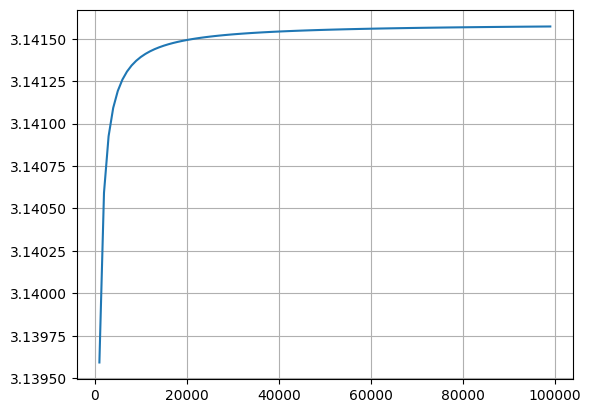

In [ ]:
#np.vectorize convierte todo lo debajo a un vector
def hallar(N):
  pos = np.arange(1,N,4)
  neg = np.arange(3,N,4)
  tot = 1/pos - 1/neg
  return 4 * sum(tot)

N = np.arange(1000,100000,1000)
conv = np.zeros(len(N))

for i in range(len(N)):
  conv[i] = hallar(N[i])

plt.plot(N,conv)
plt.grid()

6. Eliminación Gauss

In [ ]:
def eliminacion(u):

  a_rem = 0
  a = 0
  b = 0
  cambio_0 = 0


  for j in range(0, len(u) - 1):

    for i in range(0,len(u)):

      if i == j and u[i,j] != 1:
        a = u[i,j]
        a_rem = u[i,j::] / a
        u[i,j::] = a_rem

      if u[i,j] != 1 and i != j and u[i,j] != 0:

        a = u[i,j]
        u[i,j::] = u[i,j::] - (a * u[j,j::])

      if u[i,j] == 1 and i != j:

        u[i,j::] = u[i,j::] - u[j,j::]

  u[len(u) - 1,len(u) - 1] = u[len(u) - 1,len(u) - 1] / u[len(u) - 1,len(u) - 1]

  return u

In [ ]:
a = 1.0 * np.random.randint(0,20,(3,3))
print(eliminacion(a))

[[ 1.          0.          1.        ]
 [ 0.          1.         -0.66666667]
 [ 0.          0.          1.        ]]


7. Multiplicación matrices

In [ ]:
#multiplicar dos matrices

def multiplicacion(A,B):



  if len(A[0:]) == len(B[0,0::]):

    C = np.zeros((len(A[0:]),len(B[0,0::])))
    sum = 0
    mult = 0
    N_aca = 0

    while N_aca != len(A):

      for i in range(len(A)):

        for j in range(len(A[0,::])):

          mult = A[N_aca,j] * B[j,i]
          sum += mult

        C[N_aca,i] = sum
        sum = 0
        mult = 0

      N_aca += 1

  else: return print(f'Error, no coinciden filas de A ({len(A[0:])}) con columnas de B({len(B[0,0::])})')

  return C

In [ ]:
A = np.random.randint(0,10,(4,3))
B = np.random.randint(0,10,(3,4))
resultado = multiplicacion(A,B)
resultado

array([[60., 39., 38., 25.],
       [54., 99., 88., 59.],
       [15., 64., 35., 57.],
       [67., 95., 83., 60.]])

8. Metodo de Euler ecuaciones diferenciales

In [ ]:
def Euler(dxdy,x_0,x_f,y_0, N = 50):

  h = (x_f - x_0) / (N - 1)
  t = np.linspace(int(x_0),int(x_f) + h, N)
  y = np.zeros(len(t))
  y[0] = y_0

  for i in range(0, N - 1):

    y[i + 1] = y[i] + (h * dxdy(y[i],t[i]))

  return y[-1]

In [ ]:
def ec_2(y,x):
  return 2*x*y

Euler(ec_2,1,1.5,1)

2.704265355999063

9. Diagonalización

In [ ]:
import sympy as sp
A = sp.Matrix([
     [2,-1,1],
     [0,3,-1],
     [2,1,3]])

In [ ]:
J, P = A.jordan_form()
J

Matrix([
[-1, 0,  1],
[ 1, 1, -1],
[ 1, 0,  1]])

In [ ]:
P

Matrix([
[2, 1, 0],
[0, 2, 0],
[0, 0, 4]])

10. Atractor de Lorentz

In [ ]:
from scipy.integrate import odeint
import plotly.graph_objs as go

In [ ]:
def atractor(r,t,sigma,rho,beta):
  x = r[0]
  y = r[1]
  z = r[2]

  dxdt = sigma * (y - x)
  dydt = x * (rho - z) - y
  dzdt = (x * y) - (beta * z)

  return np.array([dxdt,dydt,dzdt])

In [ ]:
#Condiciones iniciales
t = np.linspace(0,51,1000)
r_1 = np.array([1.5,1.5,1.5])
r_2 = np.array([1.5,5,1.5])
r_3 = np.array([1,1,1])
r_4 = np.array([1001,1.001,1.001])
params = (10.0, 28.0,8.0 / 3)

In [ ]:
#Solucion
solution_1 = np.zeros(len(t))
solution_2 = np.zeros(len(t))
solution_3 = np.zeros(len(t))
solution_4 = np.zeros(len(t))

solution_1 = odeint(atractor,r_1,t,args = (params))
solution_2 = odeint(atractor,r_2,t,args = (params))
solution_3 = odeint(atractor,r_3,t,args = (params))
solution_4 = odeint(atractor,r_4,t,args = (params))

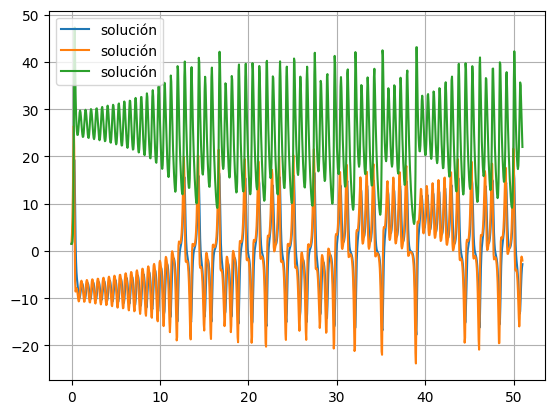

In [ ]:
plt.plot(t,solution_1[:,0],label='solución')
plt.plot(t,solution_1[:,1],label='solución')
plt.plot(t,solution_1[:,2],label='solución')
plt.grid()
plt.legend()

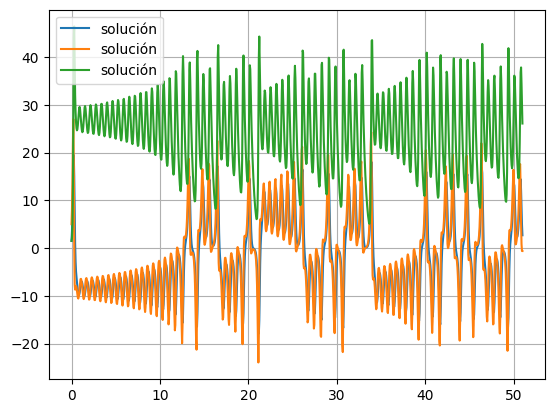

In [ ]:
plt.plot(t,solution_2[:,0],label='solución')
plt.plot(t,solution_2[:,1],label='solución')
plt.plot(t,solution_2[:,2],label='solución')
plt.grid()
plt.legend()

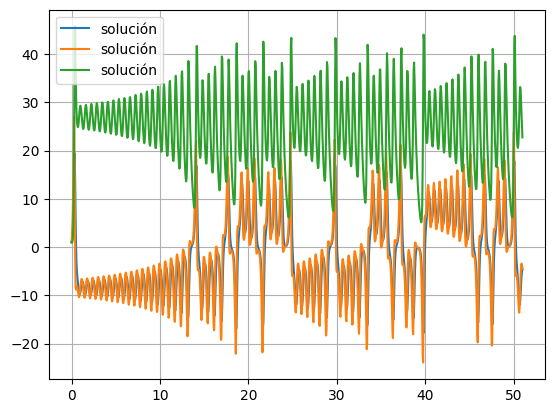

In [ ]:
plt.plot(t,solution_3[:,0],label='solución')
plt.plot(t,solution_3[:,1],label='solución')
plt.plot(t,solution_3[:,2],label='solución')
plt.grid()
plt.legend()

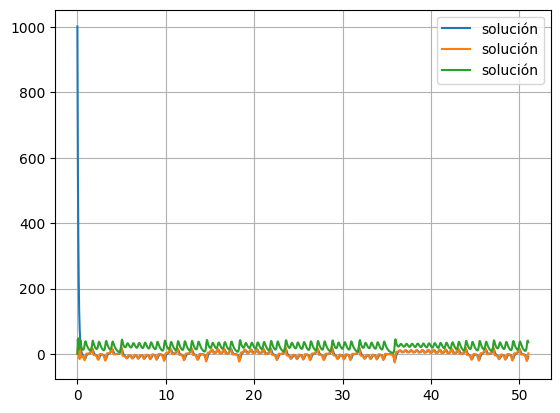

In [ ]:
plt.plot(t,solution_4[:,0],label='solución')
plt.plot(t,solution_4[:,1],label='solución')
plt.plot(t,solution_4[:,2],label='solución')
plt.grid()
plt.legend()

In [ ]:
# Supongamos que 't' es el tiempo y 'sol' tiene tres columnas que corresponden a x, y, z.
# Si 't' es el tiempo y 'sol' tiene 3 columnas para las coordenadas x, y, z:

# Crear la traza para el gráfico 3D
trace = go.Scatter3d(
    x=solution_1[:, 0],  # Columna 0 para x
    y=solution_1[:, 1],  # Columna 1 para y
    z=solution_1[:, 2],  # Columna 2 para z
    mode='lines',  # Puedes usar 'lines' o 'markers' o ambos
    name='Solución 3D'
)

# Crear el layout para el gráfico 3D
layout = go.Layout(
    title='Parametro 1',
    scene=dict(
        xaxis=dict(title='Eje X'),
        yaxis=dict(title='Eje Y'),
        zaxis=dict(title='Eje Z')
    ),
    showlegend=True
)

# Crear la figura con la traza y el layout
fig = go.Figure(data=[trace], layout=layout)

# Mostrar el gráfico
fig.show()

In [ ]:
# Supongamos que 't' es el tiempo y 'sol' tiene tres columnas que corresponden a x, y, z.
# Si 't' es el tiempo y 'sol' tiene 3 columnas para las coordenadas x, y, z:

# Crear la traza para el gráfico 3D
trace = go.Scatter3d(
    x=solution_2[:, 0],  # Columna 0 para x
    y=solution_2[:, 1],  # Columna 1 para y
    z=solution_2[:, 2],  # Columna 2 para z
    mode='lines',  # Puedes usar 'lines' o 'markers' o ambos
    name='Solución 3D'
)

# Crear el layout para el gráfico 3D
layout = go.Layout(
    title='Parametro 2',
    scene=dict(
        xaxis=dict(title='Eje X'),
        yaxis=dict(title='Eje Y'),
        zaxis=dict(title='Eje Z')
    ),
    showlegend=True
)

# Crear la figura con la traza y el layout
fig = go.Figure(data=[trace], layout=layout)

# Mostrar el gráfico
fig.show()

In [ ]:
# Supongamos que 't' es el tiempo y 'sol' tiene tres columnas que corresponden a x, y, z.
# Si 't' es el tiempo y 'sol' tiene 3 columnas para las coordenadas x, y, z:

# Crear la traza para el gráfico 3D
trace = go.Scatter3d(
    x=solution_3[:, 0],  # Columna 0 para x
    y=solution_3[:, 1],  # Columna 1 para y
    z=solution_3[:, 2],  # Columna 2 para z
    mode='lines',  # Puedes usar 'lines' o 'markers' o ambos
    name='Solución 3D'
)

# Crear el layout para el gráfico 3D
layout = go.Layout(
    title='Parametro 3',
    scene=dict(
        xaxis=dict(title='Eje X'),
        yaxis=dict(title='Eje Y'),
        zaxis=dict(title='Eje Z')
    ),
    showlegend=True
)

# Crear la figura con la traza y el layout
fig = go.Figure(data=[trace], layout=layout)

# Mostrar el gráfico
fig.show()

In [ ]:
# Supongamos que 't' es el tiempo y 'sol' tiene tres columnas que corresponden a x, y, z.
# Si 't' es el tiempo y 'sol' tiene 3 columnas para las coordenadas x, y, z:

# Crear la traza para el gráfico 3D
trace = go.Scatter3d(
    x=solution_4[:, 0],  # Columna 0 para x
    y=solution_4[:, 1],  # Columna 1 para y
    z=solution_4[:, 2],  # Columna 2 para z
    mode='lines',  # Puedes usar 'lines' o 'markers' o ambos
    name='Solución 3D'
)

# Crear el layout para el gráfico 3D
layout = go.Layout(
    title='Parametro 4',
    scene=dict(
        xaxis=dict(title='Eje X'),
        yaxis=dict(title='Eje Y'),
        zaxis=dict(title='Eje Z')
    ),
    showlegend=True
)

# Crear la figura con la traza y el layout
fig = go.Figure(data=[trace], layout=layout)

# Mostrar el gráfico
fig.show()

11. Pendulo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [ ]:
def pendulo(r,t,b,m,L,g):
  theta = r[0]
  omega = r[1]
  dthetadt = omega
  domegadt = -(b / m * L) * omega - (g / L) * np.sin(theta)

  return np.array([dthetadt,domegadt])

In [ ]:
#Condiciones iniciales
r_pend = np.array([np.pi / 4,0])
t_0 = np.linspace(0,16,1000)
params_2 = (1.0,0.5,1.0,9.8)
#Solución
pend_sol = odeint(pendulo,r_pend,t_0,args = params_2)

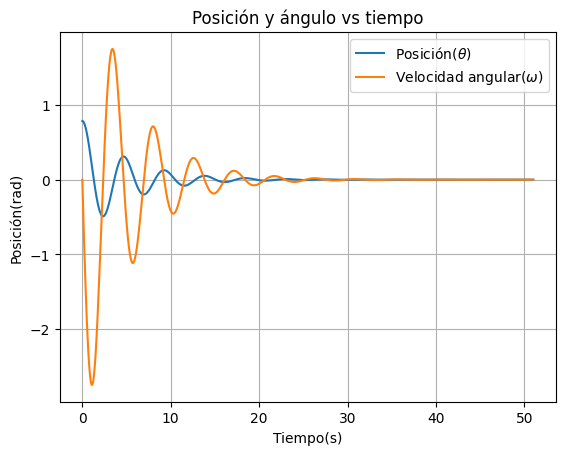

In [ ]:
#Graficas
plt.plot(t,pend_sol[:,0],label=r'Posición$(\theta)$')
plt.plot(t,pend_sol[:,1],label=r'Velocidad angular$(\omega)$')
plt.title('Posición y ángulo vs tiempo')
plt.xlabel('Tiempo(s)')
plt.ylabel('Posición(rad)')
plt.grid()
plt.legend()